# Data Cleaning with Pandas
## Missing Values
salah satu hal yang membuat data kita "kotor" adalah missing values, data yang hilang. Selain itu, ada juga

## Invalid Values
data yang tidak masuk akal, seperti jumlah kamar mandi "HURLEY" atau apakah rumah sedang dihuni/ tidak sebagai "12" termasuk invalid values.

Invalid values perlu kita hapus, daripada dia membuat data lainnya aneh. Setelah dihapus dia akan menjadi missing values.

## Strategi menghadapi missing values
Saat kita punya data yang bolong bolong tidak lengkap ada missing values nya, kita bisa melakukan:
- hapus semua data yang ada missing values (tapi sayang banyak data yang hilang, dan mungkin hasil analisa bisa tidak terlalu akurat)
- isi data yang missing menggunakan data lainnya, misalnya pakai rata-rata atau median (angka), atau value yang paling sering muncul (non numerik). tapi kekurangannya adalah asumsi yang kita buat mungkin tidak akurat.

# Studi Kasus
kita coba import data dari https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv yang memiliki banyak missing dan invalid values

In [ ]:
import pandas as pd
import numpy as np

from datetime import datetime

In [ ]:
# numpy bisa set missing value nan
np.nan

nan

In [ ]:
df_house = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')
df_house

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


ktia bisa lihat bahwa ada null values. null values di dataframe ditulis sebagai NaN

In [ ]:
# kita bisa gunakan isnull() untuk cek data yang "missing"
# lalu kita gunakan .sum() untuk mentotal value yang TRUE dari hasil isnull()
# jadi ini adalah total Null values, total missing values
df_house.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

Setelah bisa mendeteksi data yang "kotor" kita mulai bersihkan

In [ ]:
df_house

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
# buat copy data awal
df_house_copy = df_house.copy()

In [ ]:
# mulai dari kolom PID
current_id = 1000001000.0
index = 0
for row in df_house['PID']:
  print(current_id, row, type(row))
  # ubah value kolom PID di df_house_copy ke angka yang benar
  df_house_copy.loc[index, 'PID'] = current_id

  current_id = current_id + 1000
  index = index + 1


1000001000.0 100001000.0 <class 'float'>
1000002000.0 100002000.0 <class 'float'>
1000003000.0 100003000.0 <class 'float'>
1000004000.0 100004000.0 <class 'float'>
1000005000.0 nan <class 'float'>
1000006000.0 100006000.0 <class 'float'>
1000007000.0 100007000.0 <class 'float'>
1000008000.0 100008000.0 <class 'float'>
1000009000.0 100009000.0 <class 'float'>


In [ ]:
df_house_copy

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,1.000001e+09,104.0,PUTNAM,Y,3,1,1000
1,1.000002e+09,197.0,LEXINGTON,N,3,1.5,--
2,1.000003e+09,NaN,LEXINGTON,N,NaN,1,850
3,1.000004e+09,201.0,BERKELEY,12,1,NaN,700
4,1.000005e+09,203.0,BERKELEY,Y,3,2,1600
5,1.000006e+09,207.0,BERKELEY,Y,NaN,1,800
6,1.000007e+09,NaN,WASHINGTON,NaN,2,HURLEY,950
7,1.000008e+09,213.0,TREMONT,Y,--,1,NaN
8,1.000009e+09,215.0,TREMONT,Y,na,2,1800


kita sudah isi paksa value di kolom PID dengan value yang benar, angka urut 1milyar 1000, 1milyar 2000, ...

lanjut, untuk kolom ST_NUM kita perlu hapus atau isi missing value NaN di dua tempat.

In [ ]:
# kita isi saja angka jalan yang tidak kita ketahui dengan 100
df_house_copy['ST_NUM'].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [ ]:
kondisi = df_house_copy['ST_NUM'].isna()
df_house_copy[kondisi]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
2,1.000003e+09,NaN,LEXINGTON,N,NaN,1,850
6,1.000007e+09,NaN,WASHINGTON,NaN,2,HURLEY,950


In [ ]:
int(df_house_copy['ST_NUM'].mean())

171

note: masing-masing teknik mengisi atau menghapus missing values ada pro con nya. penting untuk menyesuaikan tujuan analisa data dengan teknik yang kita gunakan.

In [ ]:
df_house_copy.loc[kondisi, "ST_NUM"] = 100
df_house_copy

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,1.000001e+09,104.0,PUTNAM,Y,3,1,1000
1,1.000002e+09,197.0,LEXINGTON,N,3,1.5,--
2,1.000003e+09,100.0,LEXINGTON,N,NaN,1,850
3,1.000004e+09,201.0,BERKELEY,12,1,NaN,700
4,1.000005e+09,203.0,BERKELEY,Y,3,2,1600
5,1.000006e+09,207.0,BERKELEY,Y,NaN,1,800
6,1.000007e+09,100.0,WASHINGTON,NaN,2,HURLEY,950
7,1.000008e+09,213.0,TREMONT,Y,--,1,NaN
8,1.000009e+09,215.0,TREMONT,Y,na,2,1800


kita bisa gunakan teknik .isna() dari pandas untuk mengambil data dengan value NaN saja, lalu kita gunakan .loc() untuk set value di baris baris tersebut.

berikutnya, kita lihat kolom OWN_OCCUPIED

## statement Try Except
try dan except kita gunakan untuk mencoba dan menangkap error di code yand dicoba.

contohnya, kita coba run `int("halo")` di dalam blok code `try`

ini akan berakibat error, karena string "halo" tidak bisa di konversi ke integer, tapi bukannya program berhenti dengan error message, program akan lanjut ke blok code `except`

di dalam blok code `except` kita bisa lanjut menjalankan code, misalnya dengan bilang `print("baris barusan bukan numerik")`

In [ ]:
try:
  int("halo")
  print("a")
except:
  print("tidak bisa konversi ke integer")

print("b")

tidak bisa konversi ke integer
b


di kode.id dicontohkan cara untuk mengecek setiap value satu per satu per baris di kolom OWN_OCCUPIED apakah numerik atau tidak. kalau tidak, dianggap data valid. kalau numerik (bisa berubah jadi integer), dianggap data invalid.

disini kt bisa coba approach yang berbeda, yaitu cek apakah value nya Y atau N. Y boleh, N juga boleh. kalau bukan dua value ini, kita ubah ke U untuk representasi Unknown.

In [ ]:
# cari baris data yang Y dan N
valueY = df_house_copy['OWN_OCCUPIED'] == 'Y'
valueN = df_house_copy['OWN_OCCUPIED'] == 'N'

In [ ]:
valueYatauN = valueY | valueN
valueYatauN

0     True
1     True
2     True
3    False
4     True
5     True
6    False
7     True
8     True
Name: OWN_OCCUPIED, dtype: bool

In [ ]:
df_house_copy[valueYatauN]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,1.000001e+09,104.0,PUTNAM,Y,3,1,1000
1,1.000002e+09,197.0,LEXINGTON,N,3,1.5,--
2,1.000003e+09,100.0,LEXINGTON,N,NaN,1,850
4,1.000005e+09,203.0,BERKELEY,Y,3,2,1600
5,1.000006e+09,207.0,BERKELEY,Y,NaN,1,800
7,1.000008e+09,213.0,TREMONT,Y,--,1,NaN
8,1.000009e+09,215.0,TREMONT,Y,na,2,1800


kita pakai tanda `~` untuk membalik value boolean nya di kondisi `valueYatauN`

tadinya true jadi false. tadinya false jadi true.

tadinya kita dapat khusus baris2 data yang di kolom OWN_OCCUPIED berisi Y atau N

sekarang kita dapat khusus baris2 data yang di kolom OWN_OCCUPIED bukan berisi Y atau N

In [ ]:
~valueYatauN

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [ ]:
df_house_copy[~valueYatauN]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
3,1.000004e+09,201.0,BERKELEY,12,1,NaN,700
6,1.000007e+09,100.0,WASHINGTON,NaN,2,HURLEY,950


In [ ]:
df_house_copy.loc[~valueYatauN, 'OWN_OCCUPIED'] = "U"

In [ ]:
df_house_copy

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,1.000001e+09,104.0,PUTNAM,Y,3,1,1000
1,1.000002e+09,197.0,LEXINGTON,N,3,1.5,--
2,1.000003e+09,100.0,LEXINGTON,N,NaN,1,850
3,1.000004e+09,201.0,BERKELEY,U,1,NaN,700
4,1.000005e+09,203.0,BERKELEY,Y,3,2,1600
5,1.000006e+09,207.0,BERKELEY,Y,NaN,1,800
6,1.000007e+09,100.0,WASHINGTON,U,2,HURLEY,950
7,1.000008e+09,213.0,TREMONT,Y,--,1,NaN
8,1.000009e+09,215.0,TREMONT,Y,na,2,1800


untuk kolom NUM_BEDROOMS dan SQ_FT masalahnya sama, ada beberapa value seperti "--" dan "na" yang sebenarnya adalah missing value, tapi Pandas DataFrame tidak tau itu termasuk missing value. Jadinya dianggap ada value, value nya "--" atau "na"

kita bisa ubah sedikit di awal untuk data yang ini, saat import, kita bisa tambahkan opsi `na_values` saat import data.

`pd.read_csv('filekita', na_values=["na", "--"])`

dengan begitu semua data yang isinya "na" atau "--" dianggap missing values dan menjadi NaN juga

In [ ]:
value_strip = df_house_copy == "--"
value_strip

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False


In [ ]:
value_na = df_house_copy == "na"
value_na

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,True,False,False


In [ ]:
missing_values_strip_na = value_strip | value_na
missing_values_strip_na

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False
8,False,False,False,False,True,False,False


In [ ]:
df_house_copy[missing_values_strip_na] = np.nan

In [ ]:
df_house_copy

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,1.000001e+09,104.0,PUTNAM,Y,3,1,1000
1,1.000002e+09,197.0,LEXINGTON,N,3,1.5,NaN
2,1.000003e+09,100.0,LEXINGTON,N,NaN,1,850
3,1.000004e+09,201.0,BERKELEY,U,1,NaN,700
4,1.000005e+09,203.0,BERKELEY,Y,3,2,1600
5,1.000006e+09,207.0,BERKELEY,Y,NaN,1,800
6,1.000007e+09,100.0,WASHINGTON,U,2,HURLEY,950
7,1.000008e+09,213.0,TREMONT,Y,NaN,1,NaN
8,1.000009e+09,215.0,TREMONT,Y,NaN,2,1800


In [ ]:
df_house_copy.isnull().sum()

PID             0
ST_NUM          0
ST_NAME         0
OWN_OCCUPIED    0
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

untuk kolom NUM_BATH kita bisa cek yang value invalid seperti HURLEY dengan teknik yang sama yang di kode.id, mengecek setiap baris data, kalau value di konversi ke integer menjadi error, maka kita set value tersebut ke missing value NaN dari np.nan

## latihan pendek
dari data df_house_copy diatas, cobalah isi missing values di kolom NUM_BEDROOMS dengan pilihan salah satu: data mean, data median, atau sebuah angka pilihan sendiri misalnya 0.

kenapa kalian pilih isi dengan value tersebut?

In [ ]:
df_house_copy['NUM_BEDROOMS'] = df_house_copy['NUM_BEDROOMS'].astype('float')

In [ ]:
# isi dengan mean
mean_bedrooms = df_house_copy["NUM_BEDROOMS"].mean() # ganti .median() untuk menggunakan median
mean_bedrooms

2.4

In [ ]:
# kita reassign values2 di df_house_copy kolom NUM_BEDROOMS dan kita gunakan fillna untuk isi missing values nya
df_house_copy['NUM_BEDROOMS'] = df_house_copy['NUM_BEDROOMS'].fillna(mean_bedrooms) # ganti variable mean_bedrooms dengan angka pilihan sendiri kalau menggunakan arbitraty value
df_house_copy

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,1.000001e+09,104.0,PUTNAM,Y,3.0,1,1000
1,1.000002e+09,197.0,LEXINGTON,N,3.0,1.5,NaN
2,1.000003e+09,100.0,LEXINGTON,N,2.4,1,850
3,1.000004e+09,201.0,BERKELEY,U,1.0,NaN,700
4,1.000005e+09,203.0,BERKELEY,Y,3.0,2,1600
5,1.000006e+09,207.0,BERKELEY,Y,2.4,1,800
6,1.000007e+09,100.0,WASHINGTON,U,2.0,HURLEY,950
7,1.000008e+09,213.0,TREMONT,Y,2.4,1,NaN
8,1.000009e+09,215.0,TREMONT,Y,2.4,2,1800


# Studi Kasus - Data Obesitas di Englang - file Excel
file excel tidak bisa di preview di browser, jadi link ke raw file nya akan langsung download file tersebut

(gunakan google sheets untuk versi gratis)

di contoh ini kita akan read file Excel dan ambil sheet "7.2"

In [ ]:
df_obes = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/obes.xls?raw=true',
                        sheet_name="7.2",
                        skiprows=4,
                        skipfooter=14,
                        )
df_obes = df_obes.dropna()  # drop baris yang punya missing value
# df_obes = df_obes.drop(0) # drop baris dengan index 0
df_obes

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


<Axes: >

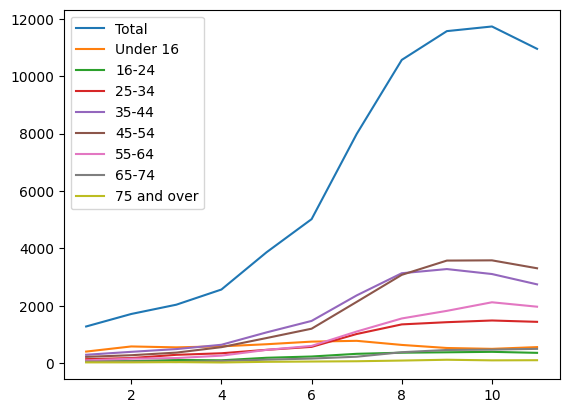

In [ ]:
df_obes.plot()

kita mau gunakan visual plot untuk membuat analisa, tapi dilihat diatas, informasi x-axis mengikuti value di index (judul baris). informasi per grup, itu dipisah per kolom. satu kolom, satu line, di line chart gabungan ini.

ada beberapa hal yang mau kt fix dari graphic diatas:
- x-axis memperlihatkan tahun, bukan angka urut 2,3,4,...
- Total tidak ikutan, karena tidak relevan ke data yang kita cari "apakah anak kecil semakin lama semakin banyak yang obesitas"

In [ ]:
# kita set value judul baris, index, menjadi tahun tahun tersebut
df_obes

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


note: kita ganti nama juga kolom `Unnamed: 0` menjadi `year`

In [ ]:
df_obes = df_obes.rename(columns={"Unnamed: 0": "year"})
df_obes

,year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


set index (judul baris) menjadi value dari kolom `year`

In [ ]:
df_obes.index = df_obes['year']
df_obes

,year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
year,,,,,,,,,,
2002/03,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


kita mau buat chart, kolom Total tidak ikutan, lalu kolom year juga tidak perlu

In [ ]:
df_obes_clean = df_obes.drop(columns=["year", "Total"])
df_obes_clean

,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
year,,,,,,,,
2002/03,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


baru kita buat plot lagi

<Axes: xlabel='year'>

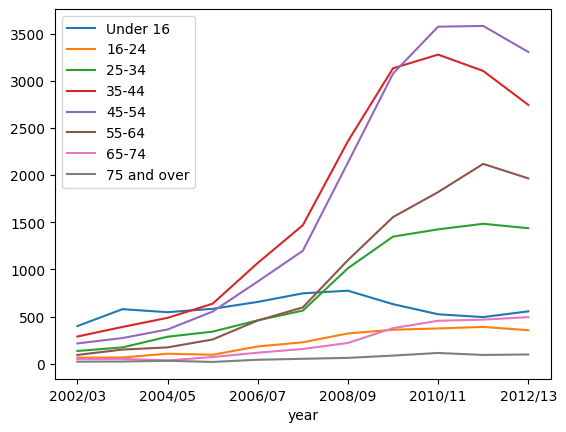

In [ ]:
df_obes_clean.plot()

<Axes: xlabel='year'>

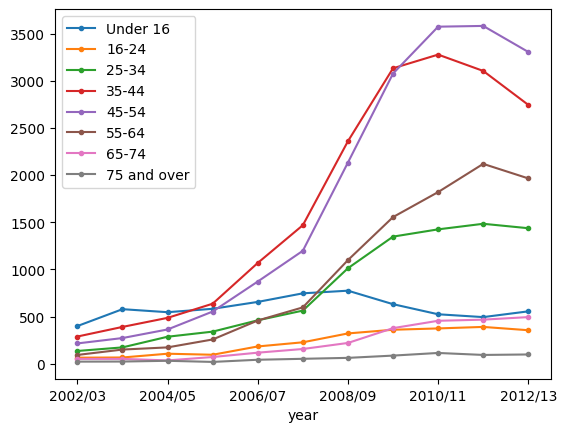

In [ ]:
df_obes_clean.plot(marker=".")

Dari plot yang terlihat diatas, kita bisa ambil kesimpulan kalau TIDAK, anak anak tidak bertambah penderita obesitas nya. Justru orang orang di braket umur 34-54 yang semakin banyak penderita obesitasnya, diikuti umur 25-34 dan 55-64 juga bertambah. yang dibawah 25 dan diatas 64 tidak banyak perubahan secara jumlah penderita obesitas.

--- konklusi analisis data obes.xls ---

## Time Series
tipe data yang ada kolom tanggal/ waktu nya

In [ ]:
# membuat data tipe datetime
pd.date_range(start="12-01-2023", end="03-31-2024", freq="W")

DatetimeIndex(['2023-12-03', '2023-12-10', '2023-12-17', '2023-12-24',
               '2023-12-31', '2024-01-07', '2024-01-14', '2024-01-21',
               '2024-01-28', '2024-02-04', '2024-02-11', '2024-02-18',
               '2024-02-25', '2024-03-03', '2024-03-10', '2024-03-17',
               '2024-03-24', '2024-03-31'],
              dtype='datetime64[ns]', freq='W-SUN')

In [ ]:
# buat dummy data tentang total penjualan baju per minggu
col_tanggal = pd.date_range(start="12-01-2023", end="03-31-2024", freq="W")
len(col_tanggal)

18

In [ ]:
col_tanggal

DatetimeIndex(['2023-12-03', '2023-12-10', '2023-12-17', '2023-12-24',
               '2023-12-31', '2024-01-07', '2024-01-14', '2024-01-21',
               '2024-01-28', '2024-02-04', '2024-02-11', '2024-02-18',
               '2024-02-25', '2024-03-03', '2024-03-10', '2024-03-17',
               '2024-03-24', '2024-03-31'],
              dtype='datetime64[ns]', freq='W-SUN')

In [ ]:
col_values = np.random.randint(0,100,size=len(col_tanggal))
col_values

array([65, 19, 63, 81, 64, 36, 92, 47, 11, 31, 46, 12, 88, 31, 21, 30, 26,
       96])

kita bisa buat dataframe dari 2 set data seperti ini, kita taruh masing masing di kolom berbeda

In [ ]:
df_penjualan = pd.DataFrame(data={"Tanggal":col_tanggal, "Penjualan":col_values})
df_penjualan

,Tanggal,Penjualan
0,2023-12-03,65
1,2023-12-10,19
2,2023-12-17,63
3,2023-12-24,81
4,2023-12-31,64
5,2024-01-07,36
6,2024-01-14,92
7,2024-01-21,47
8,2024-01-28,11
9,2024-02-04,31


diatas kita sudah berhasil membuat data dummy tentang penjualan baju per minggu sejak 3 Dec'23 sampai 31 Mar'24

Tips: untuk memudahkan manipulasi data tipe Time Series yang ada tanggal/waktu nya, bisanya kita jadikan kolom data tanggal/waktu menjadi index (judul baris) karena data di kolom tersebut pasti unik.

In [ ]:
df_penjualan.index = df_penjualan['Tanggal']
df_penjualan = df_penjualan.drop(columns=['Tanggal'])
df_penjualan

,Penjualan
Tanggal,
2023-12-03,65
2023-12-10,19
2023-12-17,63
2023-12-24,81
2023-12-31,64
2024-01-07,36
2024-01-14,92
2024-01-21,47
2024-01-28,11


Teknik yang mau di demo:
- filter per tanggal/ bulan/ tahun/ hari ... tertentu
- resample -- mengubah value penjualan dari yang tadinya per hari jadi di total per minggu, per bulan, per tahun. dari pecahan waktu lebih kecil jadi lebih besar.
- rolling sum -- menghitung jumlah sum beberapa waktu terakhir, misalnya data penjualan diatas, kita hitung total per 4 minggu terakhir.

# Filter
kita ambil data untuk bulan tertentu

In [ ]:
# ambil data khusus bulan 2
df_penjualan[df_penjualan.index.month == 2]

,Penjualan
Tanggal,
2024-02-04,31
2024-02-11,46
2024-02-18,12
2024-02-25,88


untuk data time series berbeda, kita juga bisa minta data khusus untuk pecahan waktu tertentu. tahun, bulan, tanggal, hari (weekday), jam, menit, detik, dan lainnya.

# Resample
mengubah data time series kita menjadi pecahan waktu yang lebih besar. misalnya jam ke hari, hari ke minggu, minggu ke bulan, bulan ke tahun.

In [ ]:
df_penjualan.resample("M")

setelah di resample, jangan lupa set penggabungan datanya mau di:
- sum (jam ke hari, 24 jam di jumlah jadi data 1 hari)
- mean (jam ke hari, 24 jam di rata2kan menjadi 1)

In [ ]:
# di contoh kali ini, kita pakai sum
df_penjualan.resample("M").sum()

,Penjualan
Tanggal,
2023-12-31,292
2024-01-31,186
2024-02-29,177
2024-03-31,204


dengan sekejap data penjualan per minggu kita, berubah menjadi data penjualan per bulan - total penjualan karena kita pakai sum.

# Rolling Sum
menjumlahkan beberapa data terakhir

misalkan data time series kita per hari, dan kita minta rolling sum 7, berarti kita jumlahkan data 7 hari terakhir.

Ini beda sama resample, karena resample melihat tanggalnya, dan datanya tergabung jadi satu. kalau rolling sum, dia buat kolom baru datanya jumlah sama, tapi adalah hasil sum x baris diatas.

In [ ]:
# kita coba lihat hasil penjualan 4 minggu terakhir setiap minggu nya
df_penjualan["4week"] = df_penjualan.rolling(4).sum()
df_penjualan

,Penjualan,4week
Tanggal,,
2023-12-03,65,NaN
2023-12-10,19,NaN
2023-12-17,63,NaN
2023-12-24,81,228.0
2023-12-31,64,227.0
2024-01-07,36,244.0
2024-01-14,92,273.0
2024-01-21,47,239.0
2024-01-28,11,186.0


In [ ]:
df_penjualan["4week_bf"] = df_penjualan['Penjualan'].rolling(4).sum().fillna(method="backfill")
df_penjualan

,Penjualan,4week,4week_bf
Tanggal,,,
2023-12-03,65,NaN,228.0
2023-12-10,19,NaN,228.0
2023-12-17,63,NaN,228.0
2023-12-24,81,228.0,228.0
2023-12-31,64,227.0,227.0
2024-01-07,36,244.0,244.0
2024-01-14,92,273.0,273.0
2024-01-21,47,239.0,239.0
2024-01-28,11,186.0,186.0


# Studi Kasus - Time Series - Data penggunaan energi di Jerman

kita akan gunakan data penggunaan energi di Jerman dari file https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv

kita coba pilah dan cari tren penggunaan energy dari raw data ini.

In [ ]:
df_energy = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
df_energy.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [ ]:
df_energy.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


dengan data seperti ini, kita mau cari tren penggunaan energi seperti:
- apakah ada bulan tertentu penggunaan lebih banyak energy?
- apakah ada hari tertentu di setiap minggu nya yang lebih banyak pakai energy?
- apakah ada bulan tertentu atau tahun tertentu dimana penggunaan tenaga angin dan surya lebih banyak?

Step pertama: Data Cleaning

- missing values,
- invalid values,
- ubah tipe data menjadi datetime,
- format data lainnya dan
- set value index (judul baris) menjadi data waktunya

In [ ]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


dari konteks data ini, sebenarnya data Wind, Solar, dan Wind+Solar yang missing, kemungkinan besar karena tidak dicatat, atau mungkin dulu belum ada teknologi ini. Baiknya kita tidak isi dengan data buatan sendiri seperti rata2 atau median.

In [ ]:
# bikin copy data awal
df_en = df_energy.copy()

In [ ]:
# konversi data kolom Date menjadi datetime
df_en['Date'] = pd.to_datetime(df_en['Date'])
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [ ]:
# set kolom Date menjadi index
df_en.index = df_en['Date']
df_en = df_en.drop(columns=["Date"])
df_en.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [ ]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


Note - sesi Data Cleaning sudah beres

berikutnya kita explorasi data, kita coba cari pattern, kita coba cari insight untuk analisa data

kita bisa tambahkan beberapa kolom tanggalan baru untuk membantu cari tren waktu. Misalkan tambahan kolom untuk Year, Month, Weekday

In [ ]:
df_en.index.weekday # 0 minggu, 6 sabtu

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='Date', length=4383)

In [ ]:
df_en['Year'] = df_en.index.year
df_en['Month'] = df_en.index.month
df_en['Weekday'] = df_en.index.weekday

df_en.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


dari sini kita bisa coba rangkum per tahun misalnya, apakah ada perbedaan konsumsi energi dari tahun ke tahun?

In [ ]:
yearly_en = df_en.groupby('Year')[['Consumption', 'Wind', 'Solar']].sum()
yearly_en

,Consumption,Wind,Solar
Year,,,
2006,489068.53600,0.000,0.000
2007,496631.84700,0.000,0.000
2008,495570.87600,0.000,0.000
2009,459737.42800,0.000,0.000
2010,488588.70000,35911.777,0.000
2011,484814.08600,44032.951,0.000
2012,469574.75400,45862.667,27887.332
2013,463336.85300,47197.832,29559.780
2014,504164.82100,51107.672,32498.307


<Axes: xlabel='Year'>

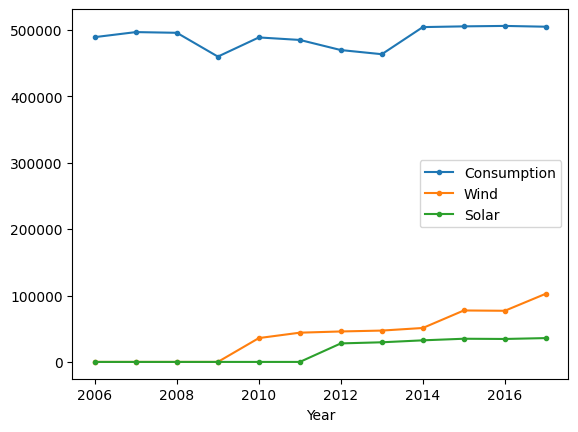

In [ ]:
# visualisasi
yearly_en.plot(marker=".")

karena value total consumption dan wind solar jauh berbeda, coba kita pisahkan plot nya

<Axes: xlabel='Year'>

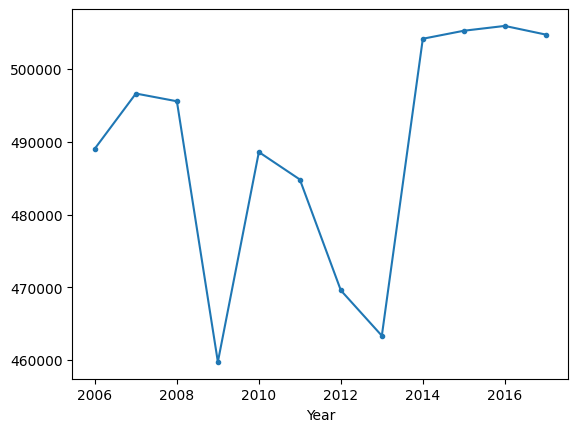

In [ ]:
yearly_en['Consumption'].plot(marker=".")

sepertinya konsumsi energy di tahun 2009 dan tahun 2013 jauh lebih sedikit dari biasanya?

<Axes: xlabel='Year'>

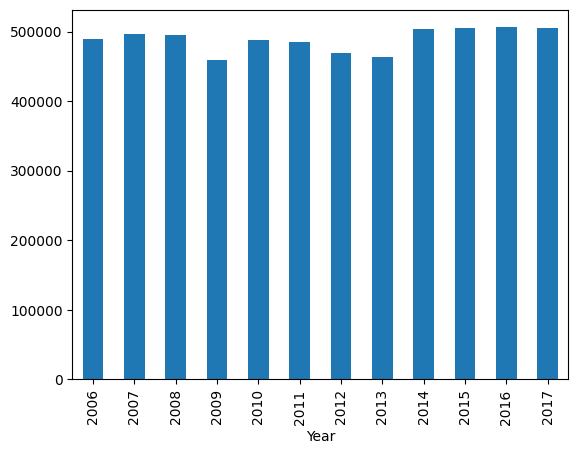

In [ ]:
yearly_en['Consumption'].plot(kind="bar")

tapi dari bar chart, sebenarnya skala penurunan pemakaian energy tidak sebanyak itu, hanya sekitar 10% perbedaan.

kita bisa cek lebih lanjut di berita di informasi di luar raw data csv kita, kenapa kira2 bisa ada penurunan total pemakaian energy di kedua tahun tersebut.

<Axes: xlabel='Year'>

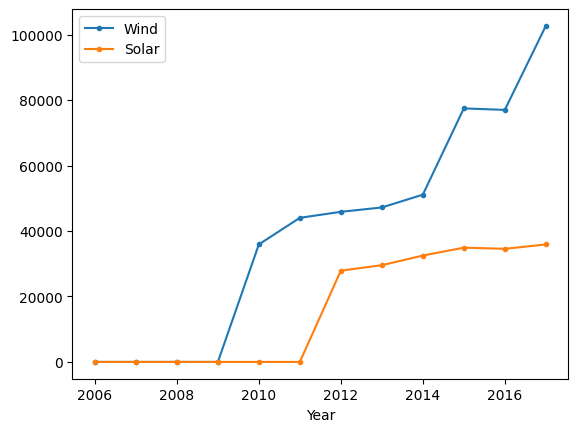

In [ ]:
yearly_en[['Wind', 'Solar']].plot(marker=".")

Next: kalau di plot per hari kenapa? kalau di plot per hari jumlah datanya akan sangat banyak, membuat "noise" sehingga sulit melihat pattern tertentu

<Axes: xlabel='Date'>

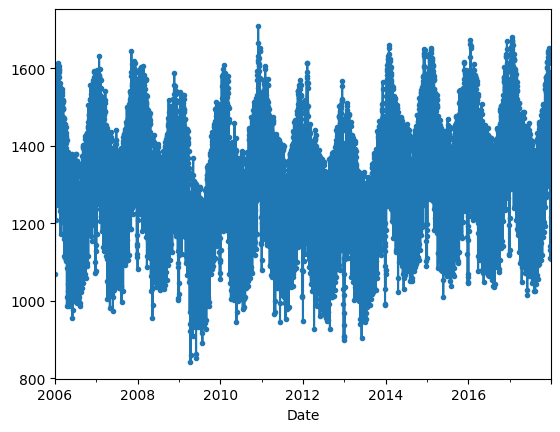

In [ ]:
df_en['Consumption'].plot(marker=".")

jadi biasanya kita mencoba menghaluskan flow data time series dengan mengambil rentang waktu tertentu seperti per bulan, per tahun, ...

In [ ]:
# contoh, kita lihat data per minggu
# pakai resampling
weekly_en = df_en['Consumption'].resample('W').sum()
weekly_en

Date
2006-01-01     1069.18400
2006-01-08     9669.10100
2006-01-15    10407.11200
2006-01-22    10430.21800
2006-01-29    10599.23800
                 ...     
2017-12-03    10753.65420
2017-12-10    10883.77462
2017-12-17    10806.99822
2017-12-24    10082.39681
2017-12-31     8422.85648
Freq: W-SUN, Name: Consumption, Length: 627, dtype: float64

<Axes: xlabel='Date'>

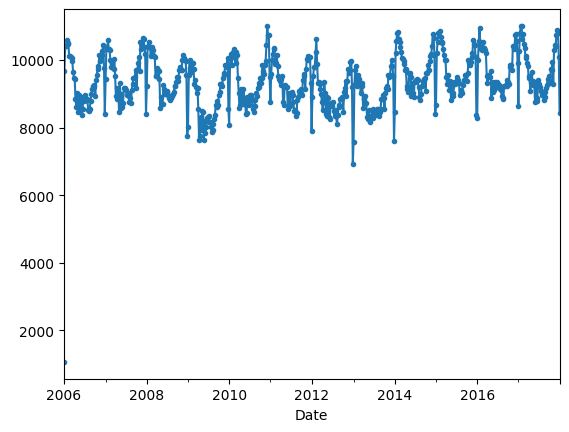

In [ ]:
weekly_en.plot(marker=".")

In [ ]:
monthly_en = df_en['Consumption'].resample('M').sum()
monthly_en

Date
2006-01-31    45304.70400
2006-02-28    41078.99300
2006-03-31    43978.12400
2006-04-30    38251.76700
2006-05-31    38858.14300
                 ...     
2017-08-31    40029.77368
2017-09-30    40078.56092
2017-10-31    42355.21893
2017-11-30    44339.72455
2017-12-31    44511.10431
Freq: M, Name: Consumption, Length: 144, dtype: float64

<Axes: xlabel='Date'>

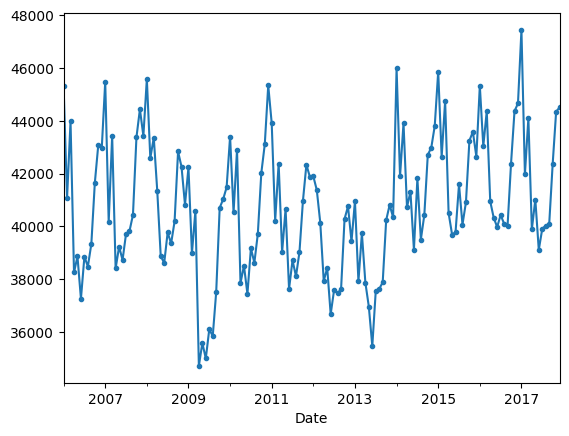

In [ ]:
monthly_en.plot(marker=".")

resampling melihat data per bulan, dari tahun sebelum sampai sekarang, sebulan sebulan maju.

kalau dari resampling per bulan, kita bisa lihat adanya tren naik turun pemakaian energy yang berbeda per bulannya. ada bulan2 yang lebih rendah dibanding yang lain makanya setiap tahun jumlah pemakaian energy bulanan naik turun.

<Axes: xlabel='Month'>

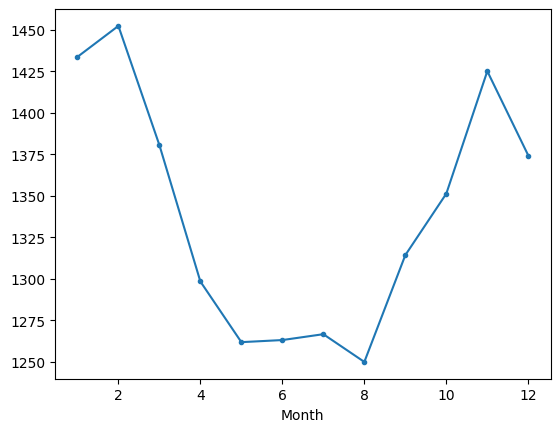

In [ ]:
# apakah berbeda kalau pakai groupby?
group_month = df_en.groupby('Month')[['Consumption', 'Wind', 'Solar']].mean()
group_month['Consumption'].plot(marker=".")

kalau groupby melihat data per bulan gabungan semua tahun.